# Dự đoán khả năng khách hàng rời bỏ

Mục tiêu của dự án là xây dựng mô hình học máy để dự đoán khả năng khách hàng rời bỏ dịch vụ, dựa trên dữ liệu lịch sử. Việc này giúp doanh nghiệp phát hiện sớm các khách hàng có nguy cơ rời bỏ và có chiến lược giữ chân phù hợp.


# Đọc và hiển thị dữ liệuliệu

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")
#df = pd.read_csv("sampleSubmission.csv")
df.head()
#df.time_spend_company.value_counts()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Hiển thị tổng quan dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

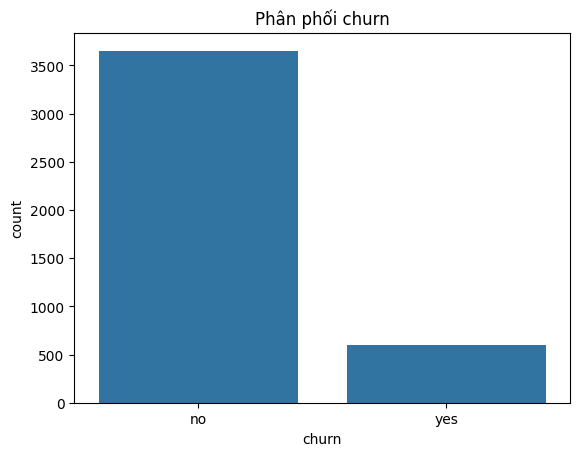

In [27]:
# Thông tin cơ bản
print(df.info())
print("\nPhân phối biến mục tiêu (churn):")
print(df['churn'].value_counts())

# Biểu đồ churn
sns.countplot(x='churn', data=df)
plt.title('Phân phối churn')
plt.show()


# Tiền xử lý dữ liệu

In [28]:
# Mã hoá các cột object
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


# Chia dữ liệu train/test và chuẩn hoá

In [29]:
X = df.drop('churn', axis=1)
y = df['churn']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hoá
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Huấn luyện mô hình

## Logistic Regression

In [30]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


## Random Forest

In [31]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Đánh giá mô hình

In [32]:
print("🔹 Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


🔹 Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       721
           1       0.61      0.23      0.34       129

    accuracy                           0.86       850
   macro avg       0.74      0.60      0.63       850
weighted avg       0.84      0.86      0.83       850

Confusion Matrix:
 [[702  19]
 [ 99  30]]


In [33]:
print("🔹 Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🔹 Random Forest Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       721
           1       0.95      0.79      0.86       129

    accuracy                           0.96       850
   macro avg       0.96      0.89      0.92       850
weighted avg       0.96      0.96      0.96       850

Confusion Matrix:
 [[716   5]
 [ 27 102]]


## Tổng kết

- Mô hình Random Forest cho kết quả tốt hơn so với Logistic Regression ở độ chính xác và độ bao phủ.
- Có thể nâng cấp mô hình bằng cách:
  - Thử thêm các thuật toán như XGBoost, LightGBM
  - Tối ưu hoá tham số (GridSearchCV)
  - Cân bằng dữ liệu nếu mất cân bằng lớp (sử dụng SMOTE)

Việc dự đoán chính xác khách hàng rời bỏ có thể giúp doanh nghiệp có chiến lược giữ chân hiệu quả hơn.
